In [5]:
!pip3 install torch
!pip3 install torchvision
!pip3 install netCDF4
from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 61.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 40.1 MB/s eta 0:00:00
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import matplotlib.pyplot as plt
import torch
from torch import optim as op
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor

class BaseClassifier(nn.Module):
  def __init__(self, indim, featdim, outdim):
    super(BaseClassifier, self).__init__()
    self.classifier = nn.Sequential(
        nn.Linear(indim, featdim, bias=True),
        nn.ReLU(),
        nn.Linear(featdim, outdim, bias=True)
    )
  def forward(self,x):
    return self.classifier(x)

traindataset = MNIST(".", train=True, download=True, transform=ToTensor())
testdataset = MNIST(".", train=False, download=True, transform=ToTensor())

trainloader = DataLoader(traindataset, batch_size=64, shuffle=True)
testloader = DataLoader(testdataset, batch_size=64, shuffle=False)


indim, featdim, outdim = 784, 256, 10
lr = 1e-4
lossfn = nn.CrossEntropyLoss()
epochs = 40
classifier = BaseClassifier(indim, featdim, outdim)
optimizer = op.SGD(classifier.parameters(), lr=lr)

def train(classifier=classifier, optimizer=optimizer, lossfn=lossfn, epochs=epochs):
  classifier.train()
  losslt = []
  for epoch in range(epochs):
    runningloss = 0.0
    for minibatch in trainloader:
      data, target = minibatch
      data = data.flatten(start_dim=1)
      out = classifier(data)
      computedloss = lossfn(out, target)
      computedloss.backward()
      optimizer.step()
      optimizer.zero_grad()
      runningloss += computedloss.item()
    losslt.append(runningloss/len(trainloader))
    print("Epoch: {} train loss: {}".format(epoch+1, runningloss/len(trainloader)))
  plt.plot([i for i in range(1,epochs+1)],losslt)
  plt.xlabel("Epoch")
  plt.ylabel("Training Loss")
  plt.title("MNIST Training Loss: optimizer {} , lr {}".format("SGD",lr))
  plt.show()
  torch.save(classifier.state_dict(), "mnist.pt")

def test(classifier = classifier, lossfn = lossfn):
  classifier.eval()
  accuracy = 0.0
  computedloss = 0.0

  with torch.no_grad():
    for data, target in testloader:
      data = data.flatten(start_dim=1)
      out = classifier(data)
      _,preds = out.max(dim=1)

      computedloss += lossfn(out,target)
      accuracy += (preds == target).sum()
    accuracy = accuracy / len(testloader.dataset) * 100
    print("Test loss: {}, test accuracy: {}".format(computedloss.item()/(len(testloader)*64), accuracy))

Epoch: 1 train loss: 2.297626793257463
Epoch: 2 train loss: 2.2803114345078783
Epoch: 3 train loss: 2.2630314771046263
Epoch: 4 train loss: 2.2455962792134234
Epoch: 5 train loss: 2.2279192519340434
Epoch: 6 train loss: 2.2098245379258827
Epoch: 7 train loss: 2.1912356942955618
Epoch: 8 train loss: 2.172051940391313
Epoch: 9 train loss: 2.1522446143855927
Epoch: 10 train loss: 2.1316909218139486
Epoch: 11 train loss: 2.110346743801255
Epoch: 12 train loss: 2.0881556445347473
Epoch: 13 train loss: 2.0650785260363174
Epoch: 14 train loss: 2.0411847001199783
Epoch: 15 train loss: 2.0163440506087182
Epoch: 16 train loss: 1.9906453664368913
Epoch: 17 train loss: 1.9639732769049052
Epoch: 18 train loss: 1.936522518775102
Epoch: 19 train loss: 1.908172448306704
Epoch: 20 train loss: 1.8790608176798709
Epoch: 21 train loss: 1.8492869311558413
Epoch: 22 train loss: 1.8187615379595807
Epoch: 23 train loss: 1.7876735951092197
Epoch: 24 train loss: 1.7561032235749494
Epoch: 25 train loss: 1.724083

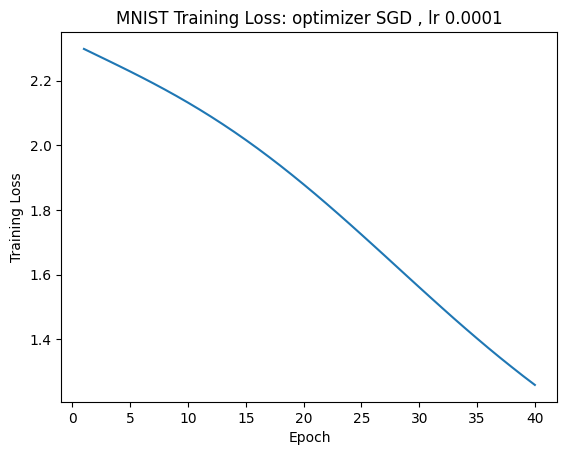

In [34]:
train()

In [35]:
test()

Test loss: 0.0191131868180196, test accuracy: 80.18000030517578
